<a href="https://colab.research.google.com/github/iceman0099/SalesPridiction/blob/main/SalesPridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
train = pd.read_csv("/content/train.csv")
train.head()

,ID,totalSales,CompetitorPrice,Income,Advertising,Population,Price,Location,Age,Education,Urban,US
0,1,6.01,131,29,11,335,127,Bad,33,12,Yes,Yes
1,2,6.50,148,51,16,148,150,Medium,58,17,No,Yes
2,3,7.70,118,71,12,44,89,Medium,67,18,No,Yes
3,4,7.78,86,54,0,497,64,Bad,33,12,Yes,No
4,5,11.82,113,66,16,322,74,Good,76,15,Yes,Yes


In [4]:
test = pd.read_csv("/content/test.csv")
test.head()

,ID,CompetitorPrice,Income,Advertising,Population,Price,Location,Age,Education,Urban,US
0,1,131,21,8,220,171,Good,29,14,Yes,Yes
1,2,118,86,7,265,114,Good,52,15,No,Yes
2,3,129,69,10,289,110,Medium,50,16,No,Yes
3,4,157,53,0,403,124,Bad,58,16,Yes,No
4,5,112,88,2,243,99,Medium,62,11,Yes,Yes


In [5]:
data = pd.read_csv("/content/sample_submission.csv")
data.head()

,ID,Category
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [6]:
def targ(x):

    if x <= 5:
        return 1
    if 5 < x <= 10:
        return 2
    else:
        return 3

In [7]:
train['Category'] = train['totalSales'].apply(targ)
train.head()

,ID,totalSales,CompetitorPrice,Income,Advertising,Population,Price,Location,Age,Education,Urban,US,Category
0,1,6.01,131,29,11,335,127,Bad,33,12,Yes,Yes,2
1,2,6.50,148,51,16,148,150,Medium,58,17,No,Yes,2
2,3,7.70,118,71,12,44,89,Medium,67,18,No,Yes,2
3,4,7.78,86,54,0,497,64,Bad,33,12,Yes,No,2
4,5,11.82,113,66,16,322,74,Good,76,15,Yes,Yes,3


In [8]:
x_train = train
y = []

for i in train['totalSales']:
    if (i<=5):
        y.append(1)
    elif (i>5 and i<=10):
        y.append(2)
    else:
        y.append(3)

y_train = y

In [9]:
x_train = train.drop(columns=['Category','totalSales'])

In [10]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [11]:
enc.fit(x_train[['Location','Urban','US']])
x_train[['Location','Urban','US']] = enc.fit_transform(x_train[['Location','Urban','US']])

x_train.head()

,ID,CompetitorPrice,Income,Advertising,Population,Price,Location,Age,Education,Urban,US
0,1,131,29,11,335,127,0.0,33,12,1.0,1.0
1,2,148,51,16,148,150,2.0,58,17,0.0,1.0
2,3,118,71,12,44,89,2.0,67,18,0.0,1.0
3,4,86,54,0,497,64,0.0,33,12,1.0,0.0
4,5,113,66,16,322,74,1.0,76,15,1.0,1.0


In [12]:
x_train

,ID,CompetitorPrice,Income,Advertising,Population,Price,Location,Age,Education,Urban,US
0,1,131,29,11,335,127,0.0,33,12,1.0,1.0
1,2,148,51,16,148,150,2.0,58,17,0.0,1.0
2,3,118,71,12,44,89,2.0,67,18,0.0,1.0
3,4,86,54,0,497,64,0.0,33,12,1.0,0.0
4,5,113,66,16,322,74,1.0,76,15,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
344,345,138,61,12,156,120,2.0,25,14,1.0,1.0
345,346,130,58,19,366,139,0.0,33,16,1.0,1.0
346,347,144,69,11,131,104,2.0,47,11,1.0,1.0
347,348,129,76,16,58,121,2.0,69,12,1.0,1.0


In [13]:
enc.fit(test[['Location','Urban','US']])
test[['Location','Urban','US']] = enc.fit_transform(test[['Location','Urban','US']])

test.head()

,ID,CompetitorPrice,Income,Advertising,Population,Price,Location,Age,Education,Urban,US
0,1,131,21,8,220,171,1.0,29,14,1.0,1.0
1,2,118,86,7,265,114,1.0,52,15,0.0,1.0
2,3,129,69,10,289,110,2.0,50,16,0.0,1.0
3,4,157,53,0,403,124,0.0,58,16,1.0,0.0
4,5,112,88,2,243,99,2.0,62,11,1.0,1.0


In [14]:
from sklearn.tree import DecisionTreeClassifier
k = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
k.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [15]:
y_pred = k.predict(test)
y_pred

array([2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 1, 3, 1, 2, 2, 2, 2, 2,
       3, 2, 3, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 1, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 2])

[Text(0.2689393939393939, 0.9615384615384616, 'x[5] <= 89.5\ngini = 0.544\nsamples = 349\nvalue = [66, 216, 67]'),
 Text(0.09696969696969697, 0.8846153846153846, 'x[6] <= 0.5\ngini = 0.515\nsamples = 44\nvalue = [1, 19, 24]'),
 Text(0.048484848484848485, 0.8076923076923077, 'x[1] <= 123.5\ngini = 0.439\nsamples = 14\nvalue = [1, 10, 3]'),
 Text(0.024242424242424242, 0.7307692307692307, 'x[7] <= 70.0\ngini = 0.18\nsamples = 10\nvalue = [1, 9, 0]'),
 Text(0.012121212121212121, 0.6538461538461539, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(0.03636363636363636, 0.6538461538461539, 'x[4] <= 224.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.024242424242424242, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.048484848484848485, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.07272727272727272, 0.7307692307692307, 'x[7] <= 78.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.06060606060606061, 0.653846153846153

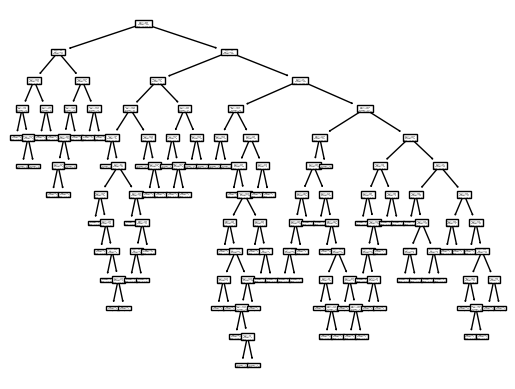

In [16]:
from sklearn import tree

t = tree.DecisionTreeClassifier(random_state =0)
t = t.fit(x_train,y_train)
tree.plot_tree(t)

In [17]:
output = pd.DataFrame({'ID':test.ID,'Category':y_pred})
output.to_csv('output.csv', index = False)